# Modeling Exercises
---

### 1. Clustering with the Iris Dataset
#### Using this lesson as a guide, perform clustering on the iris dataset.
 - Choose features other than the ones used in the lesson.
 - Visualize the results of your clustering.
 - Use the elbow method to visually select a good value for k.
 - Repeat the clustering, this time with 3 different features.

In [1]:
# imports
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

# suppress scientific notation
np.set_printoptions(suppress=True)

from sklearn.cluster import KMeans
from pydataset import data
from sklearn.preprocessing import StandardScaler

In [2]:
# load iris data
iris = data('iris')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [3]:
# rename columns
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [4]:
# define independent variables
X = iris[['sepal_length', 'petal_width']]
X.head()

,sepal_length,petal_width
1,5.1,0.2
2,4.9,0.2
3,4.7,0.2
4,4.6,0.2
5,5.0,0.2


In [5]:
# scale features
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns = X.columns)
X_scaled.head()

,sepal_length,petal_width
0,-0.900681,-1.315444
1,-1.143017,-1.315444
2,-1.385353,-1.315444
3,-1.506521,-1.315444
4,-1.021849,-1.315444


In [6]:
# create kmeans object
kmeans = KMeans(n_clusters=3, random_state=123)
# fit object
kmeans.fit(X_scaled)
# make predictions
kmeans.predict(X_scaled)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2], dtype=int32)

In [7]:
# create columns for predictions
iris['cluster'] = kmeans.predict(X_scaled)
X_scaled['cluster'] = kmeans.predict(X_scaled)

In [8]:
# create dataframe of centroids
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

,sepal_length,petal_width
0,1.236011,1.089251
1,-1.015117,-1.178937
2,0.075271,0.345515


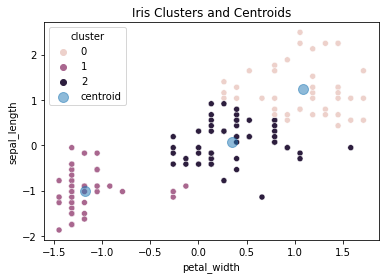

In [9]:
# visualize clusters with centroids
sns.scatterplot(x='petal_width', y='sepal_length', data=X_scaled, hue='cluster')
centroids.plot.scatter(x='petal_width', y='sepal_length', label='centroid',
                      ax=plt.gca(),
                      s=100, alpha=0.5)
plt.title('Iris Clusters and Centroids');

Text(0.5, 1.0, 'Inertia as k Changes')

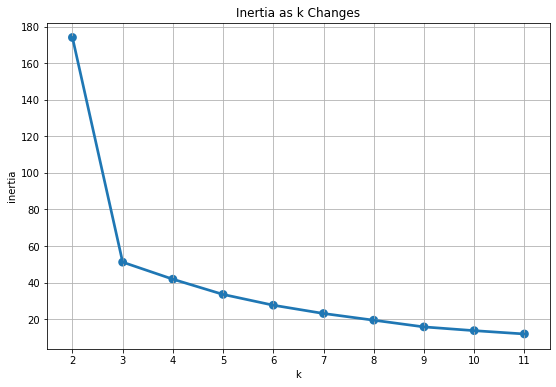

In [10]:
# create dataframe of k vs inertia
k_inertia_df = pd.DataFrame({'k':range(2, 12), 'inertia':[KMeans(k).fit(X_scaled).inertia_ for k in range(2,12)]})
# plot k vs inertia
plt.figure(figsize=(9, 6))
sns.pointplot(data=k_inertia_df, x='k', y='inertia')
plt.grid()
plt.title('Inertia as k Changes')

Once k reaches 3, the difference in inertia becomes much smaller. I can see this by looking at the visualization above; the slope of the line starts to level off at k=3. Therefore, I believe 3 is a good value for k and I will use that as my k-value.

Next I will cluster with 3 different features.

In [11]:
# choose features
X = iris[['sepal_width', 'petal_width', 'petal_length']]
# scale features
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns = X.columns)
# create kmeans object
kmeans = KMeans(n_clusters=3, random_state=123)
# fit object
kmeans.fit(X_scaled)
# make predictions
kmeans.predict(X_scaled)
# view inertia
kmeans.inertia_

95.31871713891319

<AxesSubplot:xlabel='cluster', ylabel='sepal_width'>

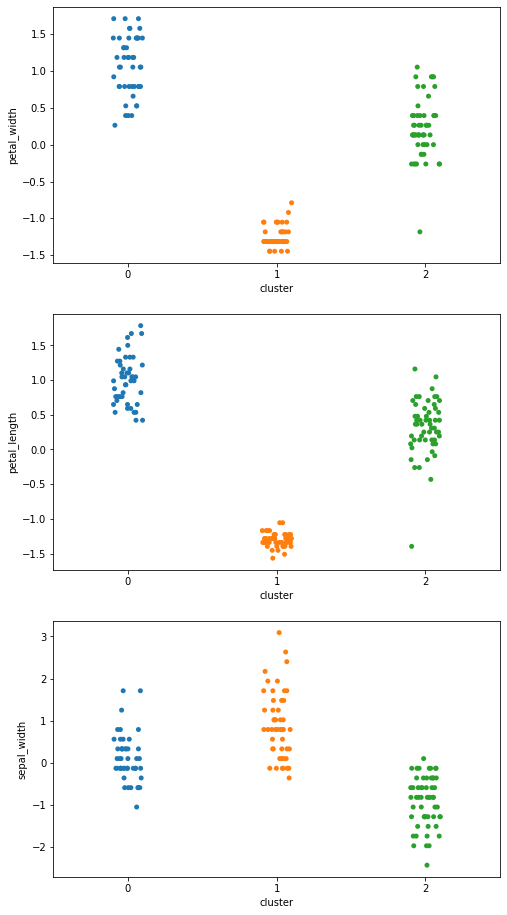

In [12]:
# visualize with 3 features

# create columns for predictions
iris['cluster'] = kmeans.predict(X_scaled)
X_scaled['cluster'] = kmeans.predict(X_scaled)
# create dataframe of centroids
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)

# plot data
plt.figure(figsize=(8,16))
plt.subplot(3, 1, 1)
sns.stripplot(data=X_scaled, x='cluster', y='petal_width')
plt.subplot(3, 1, 2)
sns.stripplot(data=X_scaled, x='cluster', y='petal_length')
plt.subplot(3, 1, 3)
sns.stripplot(data=X_scaled, x='cluster', y='sepal_width')

<AxesSubplot:xlabel='petal_width', ylabel='petal_length'>

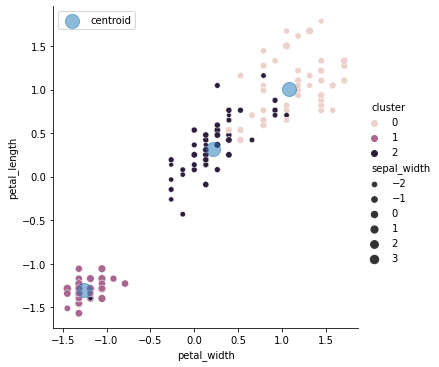

In [13]:
# plot everything together
sns.relplot(data=X_scaled, x='petal_width', y='petal_length', size='sepal_width', hue='cluster')
centroids.plot.scatter(x='petal_width', y='petal_length', label='centroid',
                      ax=plt.gca(),
                      s=200, alpha=0.5)

### 2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [14]:
# import mall customers dataset
from wrangle_zillow import get_url
url = get_url('mall_customers')
sql = '''
SELECT *
FROM customers
'''
mall = pd.read_sql(sql, url)
mall.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [15]:
# select features
X = mall[['age', 'annual_income']]
# scale features
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns = X.columns)
X_scaled

,age,annual_income
0,-1.424569,-1.738999
1,-1.281035,-1.738999
2,-1.352802,-1.700830
3,-1.137502,-1.700830
4,-0.563369,-1.662660
...,...,...
195,-0.276302,2.268791
196,0.441365,2.497807
197,-0.491602,2.497807
198,-0.491602,2.917671


In [16]:
# create kmeans object
kmeans = KMeans(n_clusters=3, random_state=123)
# fit object
kmeans.fit(X_scaled)
# make predictions
kmeans.predict(X_scaled)

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 2, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 2, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [17]:
# create columns for predictions
mall['cluster'] = kmeans.predict(X_scaled)
X_scaled['cluster'] = kmeans.predict(X_scaled)

# create dataframe of centroids
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)

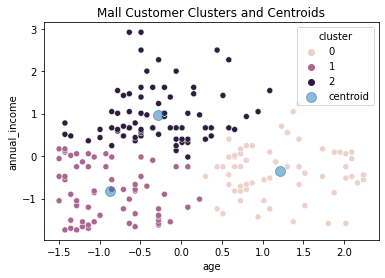

In [18]:
# visualize clusters
sns.scatterplot(x='age', y='annual_income', data=X_scaled, hue='cluster')
centroids.plot.scatter(x='age', y='annual_income', label='centroid',
                      ax=plt.gca(),
                      s=100, alpha=0.5)
plt.title('Mall Customer Clusters and Centroids');

Text(0.5, 1.0, 'Inertia as k Changes')

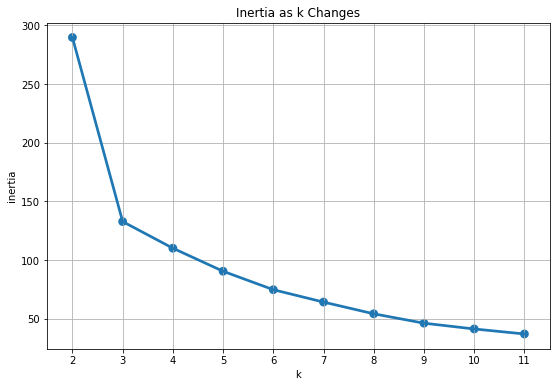

In [19]:
# create dataframe of k vs inertia
k_inertia_df = pd.DataFrame({'k':range(2, 12), 'inertia':[KMeans(k).fit(X_scaled).inertia_ for k in range(2,12)]})
# plot k vs inertia
plt.figure(figsize=(9, 6))
sns.pointplot(data=k_inertia_df, x='k', y='inertia')
plt.grid()
plt.title('Inertia as k Changes')

### 3. How does scaling impact the results of clustering?
#### Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.

### Bonus
- Read in the data from this google sheet: https://docs.google.com/spreadsheets/d/1j5EgXVTR5ikUj3G5ZCQmkq6ziz_gvtASGAdw23-5_6M/edit?usp=sharing
- Visualize the data and guess the number and shape of the clusters.
- Implement the KMeans algorithm on unscaled data and visualize the clusters.
- Repeat the step above but with scaled data.
- Write down the takeaways from this exercise.

In [20]:
# read google sheet into dataframe
data = pd.read_csv("https://docs.google.com/spreadsheets/d/1j5EgXVTR5ikUj3G5ZCQmkq6ziz_gvtASGAdw23-5_6M/export?format=csv&?usp=sharing")
data

,x,y
0,-3.641747,0.121540
1,-7.620447,1.810897
2,-6.505373,0.068072
3,7.730963,0.585521
4,17.283668,0.344804
...,...,...
795,3.941363,5.807617
796,6.057122,6.010463
797,8.373651,4.641515
798,-2.058756,6.077125


<AxesSubplot:xlabel='x', ylabel='y'>

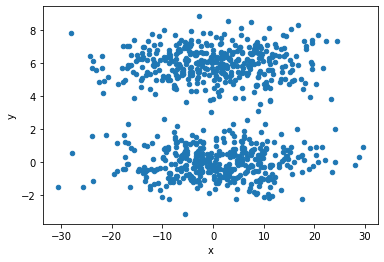

In [21]:
# visualize data
data.plot.scatter(x='x', y='y')

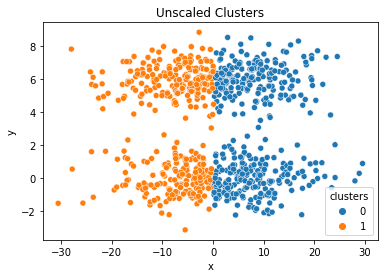

In [22]:
# cluster on unscaled data
# create object
kmeans = KMeans(n_clusters=2, random_state=123)
# fit object
kmeans.fit(data)
# make predictions
kmeans.predict(data)
# create column of clusters
data['clusters'] = kmeans.predict(data)
# create df of centroids
# centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
# visualize clusters
sns.scatterplot(x='x', y='y', data=data, hue='clusters')
# centroids.plot.scatter(x='x', y='y', label='centroid',
#                       ax=plt.gca(),
#                       s=100, alpha=0.5)
plt.title('Unscaled Clusters');

In [23]:
# scale data
scaler = StandardScaler().fit(data[['x','y']])
data_scaled = X_scaled = pd.DataFrame(scaler.transform(data[['x','y']]), columns = ['x','y'])
data_scaled

,x,y
0,-0.419211,-0.904027
1,-0.821099,-0.368472
2,-0.708466,-0.920978
3,0.729546,-0.756937
4,1.694464,-0.833249
...,...,...
795,0.346758,0.898557
796,0.560471,0.962863
797,0.794464,0.528883
798,-0.259313,0.983996


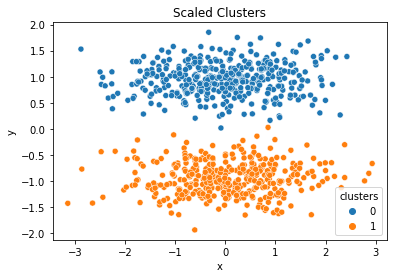

In [24]:
# cluster on scaled data
# create object
kmeans = KMeans(n_clusters=2, random_state=123)
# fit object
kmeans.fit(data_scaled)
# make predictions
kmeans.predict(data_scaled)
# create column of clusters
data_scaled['clusters'] = kmeans.predict(data_scaled)
# visualize clusters
sns.scatterplot(x='x', y='y', data=data_scaled, hue='clusters')
plt.title('Scaled Clusters');

#### Takeaways:

- Scaling the data made a big difference in how the data was clustered.
- The clusters of scaled data make more sense to me; when I initially visualized the data, that is what I imagined it would look like.